# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, используя timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
from scipy.spatial import distance
import sklearn.datasets as ds
import sklearn.metrics as smt

from tqdm import tqdm

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [3]:
N = 4 # put your index here

In [4]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [22]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    'Hierarchical clustering с поддержкой single-linkage, 
                complete-linkage, average-linkage (параметры - k, linkage)'
    """
    
    def __init__(self, k=3, linkage='single', **kwargs):
        """
        Инициализация метода
        :k - количество кластеров, значение по умолчанию - 3
        :linkage - тип связей: single, complete, average (по умолчанию single)
        """
        self.linkage = linkage
        self.k = k
        return
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        self.labels = np.linspace(0, self.x_len - 1, num = self.x_len, dtype = int) 
            # изначально каждый объект является самостоятельным кластером
            
        # выбор метрики, сами метрики - функции двух параметров, - вынесены в отдельные методы класса
        if self.linkage == 'complete':
            metric = self.complete_  # max(distances(a, b), a from A, b from B)
        if self.linkage == 'single':
            metric = self.single_    # min(distances(a, b), a from A, b from B)
        if self.linkage == 'average':
            metric = self.average_   # sum(sum(distances(a, b)) by a from A) by b from B) / (|A| * |B|)
        
        
        base_labels = np.linspace(0, self.x_len - 1, num = self.x_len, dtype = int) 
                     #self.labels[:] # здесь будем индексировать те "опорные" кластеры, 
                                     # которые не были поглощены в результате слияния
        
        # пока не достигнуто желаемоме количество кластеров
        while self.x_len > self.k:
            step = 0
            cluster_a = -1 # кластер, в который будут слиты данные
            cluster_b = -1 # кластер, который исчезнет в результате слияния
            min_dist = float('inf')  # расстояние между кандидатами A и B на слияние
            
            for label_a in base_labels[:]:  # вычислили и запомнили номера наиболее близких кластеров
                step = step + 1
                candidate_a = x[(self.labels == label_a)]
                for label_b in base_labels[step:]:
                    candidate_b = x[(self.labels == label_b)]
                    dist = metric(candidate_a, candidate_b) 
                    if dist < min_dist: 
                        min_dist = dist
                        cluster_a = label_a      
                        cluster_b = label_b
            
            self.labels[(self.labels == cluster_b)] = cluster_a   # перенесли из кластера B в кластер A
            base_labels = base_labels[(base_labels != cluster_b)]   # кластер B убрали из списка "основных"
            self.x_len = self.x_len - 1                         # кластеров вообще стало на 1 меньше
        return self
         
    def single_(self, a, b):
        a_len = len(a) 
        b_len = len(b) 
            
        min_dist = float('inf')
        for i in xrange(a_len):
            for j in xrange(b_len):
                dist = np.linalg.norm(a[i] - b[j])
                if dist < min_dist:
                    min_dist = dist
        return min_dist
     
    def complete_(self, a, b):
        a_len = len(a) 
        b_len = len(b) 
        
        max_dist = 0
        for i in xrange(a_len):
            for j in xrange(b_len):
                dist = np.linalg.norm(a[i] - b[j])
                if dist > max_dist:
                    max_dist = dist
        return max_dist
    
    def average_(self, a, b):
        a_len = len(a) 
        b_len = len(b)
        
        average_dist = 0
        for i in xrange(a_len):
            for j in xrange(b_len):
                average_dist = average_dist + np.linalg.norm(a[i] - b[j])
                
        return average_dist / (a_len * b_len)

    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

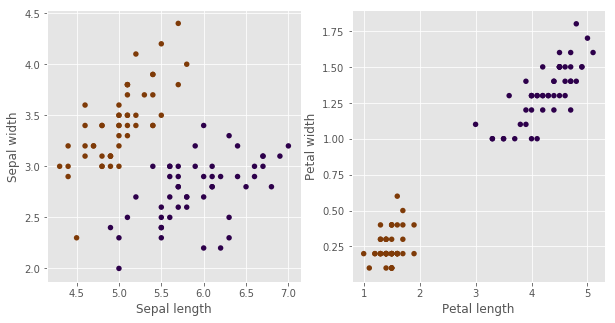

In [13]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [23]:
pred_iris = Clustering(k=2, linkage='average').fit(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(pred_iris.labels, y_iris)

Adjusted Rand index for iris is: 1.00


*Ура! Работает правильно!*

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
y_std = AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_std, y_iris)

print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_std, pred_iris.labels)

Adjusted Rand index for iris is: 1.00
Adjusted Rand index for iris is: 1.00


*Библиотечный алгоритм так же работает с идеальным рангом, и разбиения, полученные нами и ими, совпадают!*

*Сравним ещё время работы алгоритмов:*

In [26]:
%%timeit
pred_iris = Clustering(k=2, linkage='average').fit(x_iris)

1 loop, best of 3: 12 s per loop


In [27]:
%%timeit
AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(x_iris)

1000 loops, best of 3: 934 µs per loop


In [28]:
12.7 * 1000000 / 930

13655.913978494624

*):    Таким образом, рациональнее использовать библиотечный алгоритм.*

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

*Будем использовать критерий Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида).*

In [29]:
## Задание 2
def quality(x, y):
    """
    Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
    """
    quality_value = 0
    y_len = len(set(y))
    min_dist = float('inf')
    
    centroides = np.zeros((y_len, x.shape[1]))
    
    for i in xrange(y_len):
        centroides[i] = mean(x[(y == i)]) # ищем центры центройдов
        
    for obg in x[(y != 0)]:               # выбираем нулевой центройд в качестве опорного
        min_dist = distance.euclidean(obg, centroides[0, :]) # устанавливаем расстояние до него как минимум
        for i in xrange(y_len):
            dist = distance.euclidean(obg, centroides[i, :]) # среди остальных центройдов ищем ближайший
            if dist < min_dist:
                min_dist = dist
        quality_value = quality_value + np.square(min_dist)
        
    return quality_value

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

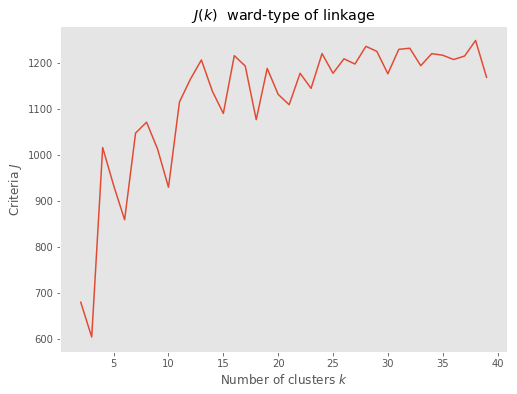

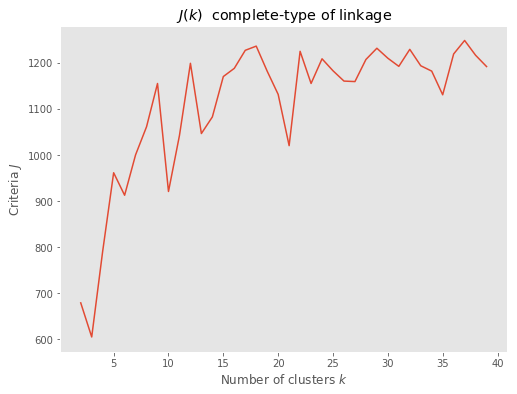

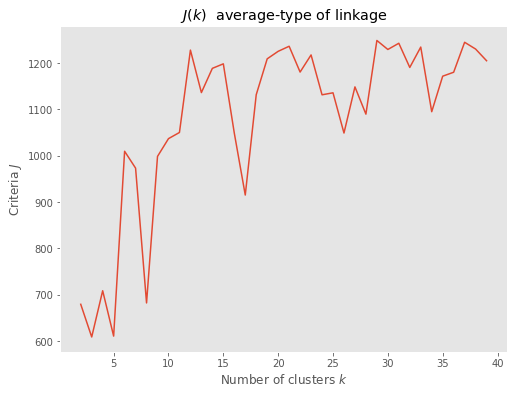

In [30]:
ks = range(2, 40)
linkages = ['ward', 'complete', 'average']
criteria = np.zeros((len(linkages), len(ks)))

for j, linkage in enumerate(linkages):
    for i, k in enumerate(ks):
        y = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit_predict(x_iris)
        criteria[j][i] = quality(x_iris, y)
    
    pl.figure(figsize=(8, 6))
    pl.plot(ks, criteria[j])
    pl.title("$J(k)$  " + linkages[j] + "-type of linkage")
    pl.ylabel("Criteria $J$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

*Насколько я понимаю, наилучшим является тот вариант, когда criteria минимальна: все точки близки к построенным центройдам.*

In [31]:
y = AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(x_iris)

In [32]:
## Задание 3

In [33]:
## Задание 4

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.